# Modulação digital em banda base
### Objetivos:

Explicar como simular aspectos básicos de um sistema de comunicação digital em banda-base
> - Probabilidade de Erro ($P_{e}$) versus Taxa de Erro de Bit ($BER$)
> - Sinais ortogonais
> - Sinais antipodais
> - Sinais ortogonais vs sinais antipodais



### Transmissão em banda-base versus transmissão em banda-passante
Na transmissão em banda-base o espectro do sinal se concentra em torno da frequência zero. Na transmissão em banda-passante, também conhecida como transmissão passa-faixa, o espectro do sinal modulado se concentra em torno de uma frequência de portadora $f_{c}$ .


## Receptor/Detector binário - Sinais Ortogonais


Dados em binário consiste em uma sequência de 0's e 1's transmitidos por meio de dois símbolos $s_{0}(t)$ e $s_{1}(t)$. Suponha que a taxa de bits é especificada como $R$ bits por segundo (bps). Logo, cada bit será mapeado num sinal correspondente conforme:

$$ 0 \mapsto s_{0}(t) $$

$$ 1 \mapsto s_{1}(t) $$

Para $0\leq t \leq T_{b}$, sendo $T_{b}=\frac{1}{R}$ definido como o intervalo de bit. Devemos assumir que a probabilidade de ocorrencia de bits $0$ e $1$ é a mesma - cada um ocorrendo com $50%$ de chance - e são estatisticamente mutualmente independentes.
Como já abordado nos nossos handsOns, o meio que o sinal atravessará injeta um ruido gaussiano, logo se comportará como um canal AWGN. 

Representando o ruído como $n(t) $ e o sinal recebido como $r(t)$, logo:
$$r(t)= s_{i}(t)+n(t)$$
Sendo $i=\left \{ 0,1 \right \} $, $s_{i}(t)$ é compreendido como ou sinal correspondente a 0 ou a 1. 

Como tratamos de sinais ortogonais, isso significa que:
$$ \int_{0}^{T_{b}} s_{0}(t) \cdot s_{1}(t)dt =0$$

### Receptor ótimo

O receptor ótimo consiste em duas partes bem distintas. Primeiro do correlator. E o segundo é o detector.

![Figura02](./handsOn10_matlab_figs/Correlator.png )
A figura acima mostra o processo de correlação  desde a multiplicação do sinal até a detecção.

#### Correlator de sinais 

O correlator de sinis, como o próprio nome diz, faz a correlação cruzada entre o sinal recebido $r(t)$ com o possível sinal transmitido $s_{0}(t)$ e $s_{1}(t)$. Ou seja, o correlator de sinal calcula duas saidas: 
$$r_{0}(t) = \int_{0}^{t} r(\tau) \cdot s_{0}(\tau) d\tau $$ 
$$r_{1}(t) = \int_{0}^{t} r(\tau) \cdot s_{1}(\tau) d\tau $$ 
no intervalo de  $0\leq t \leq T_{b}$, amostra as duas com uma taxa de $T_{b}$ e por fim entrega os sinais ao detector.

Por $n(t)$ é uma função de ruido gaussiano, cujo espectro de potência é de $\frac {N_{o}}{2}$, a componente de ruído $N_{0}$ e $N_{1}$ são gaussianos com média $\mu = 0$, em termos matemáticos:


$$ E(n_{0}) = \int_{0}^{T_{b}} s_{0}(t)\cdot$$ 


### Sinais ortogonais

Seja dois simbolos ortogonais entre si $s_{0}(t)$ e $s_{1}(t)$ transmitido.

![Figura01](./handsOn10_matlab_figs/Signals_Waveforms.png)
Suponhamos agora que um símbolo $s_{0}$ foi recebido de forma que $r(t)=s_{0}+n(t)$ sendo $n(t)$ o ruido, o correlator terá duas saídas. A primeira é referente ao simbolo $s_{0}$:
$$ r_{0}= \int_{0}^{T_{b}} r(t)s_{0}(t)dt $$
Como $r(t)=s_{0}+n(t)$
$$ r_{0}=\int_{0}^{T_{b}} s_{0}^{2}(t)dt + \int_{0}^{T_{b}} n(t)s_{0}dt  $$
Sendo $ E=\int_{0}^{T_{b}} s_{0}^{2}(t)dt$ em que $E$ é a energia do simbolo, a saida do correlator é dada por
$$r_{0}= E+n_{0} $$


Já o correlator referente ao simbolo $s_{1}$:
$$ r_{1}= \int_{0}^{T_{b}} r(t)s_{1}(t)dt $$
Separando símbolo e ruído
$$ r_{1}=\int_{0}^{T_{b}} s_{0}(t)s_{1}(t)dt + \int_{0}^{T_{b}} n(t)s_{1}dt  $$
Por $s_{0}$ e $s_{1}$ serem sinais ortogonais, $\int_{0}^{T_{b}} s_{0}(t)s_{1}(t)dt=0$ 
$$ r_{1}= n_{1} $$
Sendo $ n_{0}$ e $n_{1}$ as componentes de ruído na saida do correlator.

A energia dos dois símbolos é dita como
$$E=A^2 T_{b}$$

O mesmo se aplica quando o simbolo transmitido é $s_{1}$ , com $r_{0}=n_{0}$ e $r_{1}=E+n_{1}$ 


## Exemplo 1:

Amostre os sinais $s_0$ e $s_1$ a uma taxa de $F_{s}=\frac{20}{T_{b}}$ (Intervalo de amostragem $T_{s}=\frac{T_{b}}{20}$) e efetue a correlação de $r(t)$ com os sinais conhecidos $s_{0}(t)$ e $s_{1}(t)$ numericamente, ou seja, calcule e plote

$$ r_{0}(kT_{s}) = \sum_{n=1}^{k}r(kT_{s})\cdot s_{0}(kT_{s})$$
e 
$$ r_{1}(kT_{s}) = \sum_{n=1}^{k}r(kT_{s})\cdot s_{1}(kT_{s})$$



Para $k=[1,20]$, quando 

**(a)** $s_{0}(t)$ é o sinal transmitido;

**(b)** $s_{1}(t)$ é o sinal transmitido;

Repita os cálculos quando o sinal $r(kT_{s})$ é recebido com um ruido aditivo gaussiano cujas amostras $n(kT_{s})$ têm média $\mu = 0$ e variancia $\sigma^{2} = 0.1$ e $\sigma^{2} = 1$
### Resolução:
Para resolver isso, faremos exatamente o passo a passo mostrado acima. Recebido um sinal $r(t)$ correspondendo ao símbolo com ruído gausiano, multiplica-se o símbolo $s_{0}(t) $ e $s_{1}(t) $, e faz o somatório para doto $\tau$.

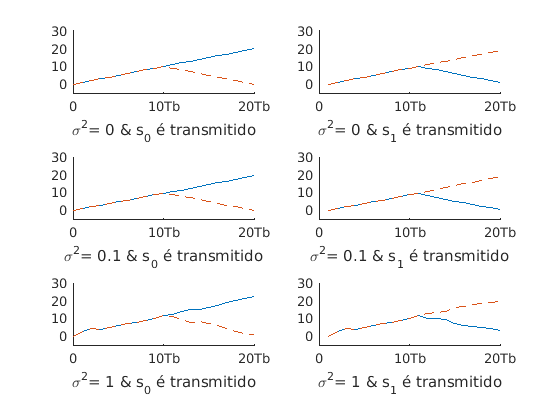

In [26]:
clc;clear all;close all;
%% Parametros
K=20;                                               % Número de amostras
A=1;                                                % Amplitude do sinal
l=0:K;                                              % Eixo amostras
% Definindo forma de onda
s_0=A*ones(1,K);                                    % Sinal 1: Um degrau
s_1=[A*ones(1,K/2) -A*ones(1,K/2)];                 % Sinal 2: Soma de degraus
% Inicializando sinais de saida
r_0=zeros(1,K);                                     % Inicializa vetor r_0
r_1=zeros(1,K);                                     % Inicializa vetor r_1
Variancia = [0 0.1 1];                              % Variâncias

%% Cálculo
% Queremos estimar 
for  ik=1:3
noise=random('Normal',0,Variancia(ik),1,K);          % Gera vetor de ruído
%% Quando s_0 é transmitido
s=s_0;                                              % Sinal enviado
r=s+noise;                                          % Sinal recebido
% Correlacionando sinais
for n=1:K
        r_0(n)=sum(r(1:n).*s_0(1:n));
        r_1(n)=sum(r(1:n).*s_1(1:n));        
end
%% Plotting 
subplot(3,2,-1+2*ik)
hold on
plot(l,[0 r_0],'-')
plot(l,[0 r_1],'--')
set(gca,'XTickLabel',{'0','10Tb','20Tb'})
axis([0 20 -5 30])
xlabel(['\sigma^{2}= ' num2str(Variancia(ik)) ' & s_{0} é transmitido'])

%% Quando s_1 é transmitido
s=s_1;                                              % Sinal enviado
r=s+noise;                                          % Sinal recebido
for n=1:K
        r_0(n)=sum(r(1:n).*s_0(1:n));
        r_1(n)=sum(r(1:n).*s_1(1:n));       
end

%% Plotting 
subplot(3,2,2*ik)
hold on
plot([0 r_0],'-')
plot([0 r_1],'--')
set(gca,'XTickLabel',{'0','10Tb','20Tb'})
axis([0 20 -5 30])
xlabel(['\sigma^{2}= ' num2str(Variancia(ik)) ' & s_{1} é transmitido'])
end

## Matched Filter (Filtro casado)
O filtro casado provê uma alternativa para o correlator de sinais na demodulação do sinal recebido $r(t)$. Um filtro que é casado com o sinal $s(t)$, onde $0\leq t \leq T_{b}$, têm uma resposta ao impulso 

$$ h(t)= s(T_{b}-t) $$

Consequentemente, o sinal $y(t)$ na saida do filtro casado quando o sinal de entrada é $s(t)$ é dado pela convolução integral


$$  y(t) = \int_{0}^{t} s(\tau)h(t-\tau) d\tau $$


Se substituirmos $ h(t)= s(T_{b}-t) $ na equação anterior, temos 


$$  y(t) = \int_{0}^{t} s(\tau)s(T_{b}-t+\tau) d\tau$$

e se amostrarmos $y(t)$ em $t= T_{b}$, obtêm-se

$$  y(T_{b}) = \int_{0}^{T_{b}} s^{2}(t)dt=E$$

Em que E é a energia do sinal $s(t)$. Sendo assim, a saida do filtro casado amostrado nos instantes $T_{b}$ é identica à saida do correlator de sinais.


Em determinadas situações, dependendo da complexidade do formato do pulso $s_{i}(t)$, realizar um filtro casado pode ser uma tarefa bastante complexa e, até mesmo, impossível. Isso implica dizer que nem sempre seu uso será viável. 


Um último comentário acerca da equivalência entre filtro casado e correlator merece atenção: perceba que o correlator calcula a integral do produto do sinal recebido por uma réplica de $s_{i}(t)$, num intervalo de $T$ segundos. Em grande parte das aplicações práticas $s_{i}(t)$ não está confinado num intervalo de $T$ segundos, almejando-se compactar o espectro do sinal transmitido. Nestes casos o correlator poderá proporcionar desempenho inferior ao correspondente filtro casado, pois realizará a integral que faz parte de sua implementação em um intervalo menor que a duração do pulso e, por consequência, a amplitude de sua saída não estará associadas à energia total do pulso. Em casos como este, a não ser
que aceitemos a degradação de desempenho resultante do uso do correlator, somos forçados a implementar o receptor com filtro casado. Vale ainda ressaltar que a diferença de desempenho anteriormente citada pode ser muito pequena a ponto de, em certos casos, poder ser desprezada. [Fonte](http://www.inatel.br/docentes/dayan/easyfolder/EE210/NotasDeAulaEE210.pdf)

## Exemplo 2:
Considerando o uso de filtro casado para demodulação, monte um demodulador para os mesmos simbolos do exemplo 1.
### Resolução
Calculamos primeiro a resposta ao impulso para os dois filtros 
>$h_{0}=s_{0}(T_{b}-t)$ 

>$h_{1}=s_{1}(T_{b}-t)$

![Filtro Casado Exemplo](./handsOn10_matlab_figs/Filtro_Casado_Ortogonal.png)



O sinal de saída será amostrado ao completar todas as amostras, no caso $k=20$. Podemos perceber então que o sinal que será enviado ao decodificador $r_{i}(t)$ quando enviado o simbolo $s_{0}$ também correspondeu a $\left \{\begin{align*} r_{0} &= E + n_{0} \\  r_{1} &= n_{1}\end{align*}\right.$ como no correlator.

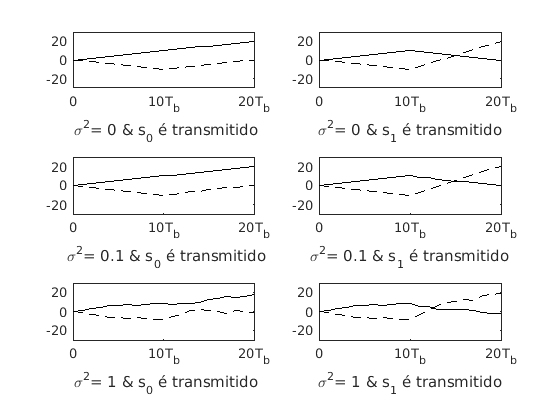

In [25]:
clc;clear all;close all;
%% Parametros
K=20;                                               % Número de amostras
A=1;                                                % Amplitude do sinal
l=0:K;                                              % Eixo amostras
Variancia=[0 0.1 1];                                % Vetor de variâncias de ruído

%% Definindo forma de onda dos símbolos
s_0=A*ones(1,K);                                    % Sinal 1: Um degrau
s_1=[A*ones(1,K/2) -A*ones(1,K/2)];                 % Sinal 2: Soma de degraus

%% Filtragem
for ik= 1:3    
noise = random('Normal',0,Variancia(ik),1,K);       % Vetor com ruído
%% Quando s_0 é transmitido
s=s_0;                                              % Sinal enviado
y=s+noise;                                          % Sinal recebido
y_0=conv(y,wrev(s_0));                              % Concolução filtro casado saída 0
y_1=conv(y,wrev(s_1));                              % Concolução filtro casado saída 1

%% Plotting
subplot(3,2,-1+2*ik)
plot(l,[0 y_0(1:K)],'- k',l,[0 y_1(1:K)],'-- k')
set(gca,'XTickLabel',{'0','10T_{b}','20T_{b}'})
axis([0 20 -30 30 ])
xlabel([' \sigma^{2}= ' num2str(Variancia(ik)) ' & s_{0} é transmitido'])

%% Quando s_1 é transmitido
s=s_1;                                              % Sinal enviado
y=s+noise;                                          % Sinal recebido
y_0=conv(y,wrev(s_0));                              % Concolução filtro casado saída 0
y_1=conv(y,wrev(s_1));                              % Concolução filtro casado saída 1

%% Plotting 
subplot(3,2,2*ik)
plot(l,[0 y_0(1:K)],'- k',l,[0 y_1(1:K)],'-- k')
set(gca,'XTickLabel',{'0','10T_{b}','20T_{b}'})
axis([0 20 -30 30 ])
xlabel(['\sigma^{2}= ' num2str(Variancia(ik)) ' & s_{1} é transmitido'])
end

## Detector

Após a passagem do sinal $r(t)$ pelo correlator ou filtro casado, dois sinais serão enviados para o detector. O detector é o elemento responsável por decidir se o símbolo recebido $r(t)$ representa $0$ ou $1$. O detector ótimo é definido como o detector que minimiza a probabilidade de erro. Seu funcionamento é bastante simples

** Regra de decisão**:
> $r_{0} > r_{1} \Rightarrow  s_{0}(t)$ 

> $r_{0} < r_{1}  \Rightarrow  s_{1}(t)$ 



No ponto de vista de um detector, errar significa

> $r_{0}< r_{1}$ quando $s_{0}$ é transmitido $\left \{\begin{align*} r_{0} &= E + n_{0} \\  r_{1} &= n_{1}\end{align*}\right.$ 

> $r_{0}> r_{1}$ quando $s_{1}$ é transmitido $\left\{\begin{align*} r_{0} &= n_{0} \\ r_{1}&= E+ n_{1} \end{align*}\right.$ 

Em termos estatísticos, a probabilidade de ocorrencia de erro quando $s_{0}$ é transmitido é dada por:

$$ P_{e}=P(r_{0}<r_{1})=P(n_{0}+E<n_{1})=P(E<n_{1}-n_{0})$$

Podemos a partir da equação acima chegar na equação da probabilidade abaixo

$$ P_{e}=\frac{1}{\sqrt{2\pi}\sigma_{x} } \int_{E}^{\infty} e^{\frac{-x^{2}}{2\sigma_{x}^{2}}} dx $$

 
 
$$P_{e} = Q\left (  \sqrt{\frac{E}{N_{0}}} \right )$$

O detalhamento matemático pode ser encontrado no livro do [Proakis](http://shannon.ir/Bookme/Contemporary%20Communication%20Systems%20Using%20MATLAB.pdf) (Pág 194), portanto,  nos deteremos apenas ao resultado.

Sendo $E/N_{0}$ chamado de signal-to-noise ratio (SNR). Também deve-se notar que a probabilidade de erro quando $s_{0}(t)$ é transmitido é identica à probabilidade de erro quando $s_{1}(t)$. Por os 0's e 1's serem igualmente provaveis de ocorrer em uma sequência de dados, a média de probabilidade de erro é dada pela equação que deduzimos acima. Abaixo será mostrado em um script de Matlab a estimação da SNR em em função da probabilidade de erro $P_{e}$.

![Detector](./handsOn10_matlab_figs/Detector_ erro.png)

Portanto, quando um símbolo $s_{i}(t)$ é transmitido, a função que descreve sua densidade de probabilidade é dada por ([Proakis](http://shannon.ir/Bookme/Contemporary%20Communication%20Systems%20Using%20MATLAB.pdf))


> $p(r_{0}|s_{0}\rightarrow transmitido)= \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{\frac{-(r_{0}-E)^2}{2\sigma^{2}}}$

> $p(r_{1}|s_{1}\rightarrow transmitido)= \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{\frac{-r_{1}^2}{2\sigma^{2}}}$


Visto que a média $\mu_{0}=E$ $\mu_{1}=0$, faremos a simulação das densidade de probabilidades


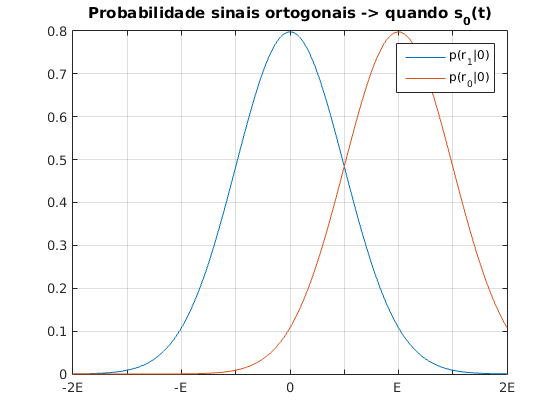

In [12]:
clc;clear all;close all;
%% Parâmetros
mu_0=0;                                             % Média símbolo 0
mu_1=1;                                             % Média símbolo 1
var=0.5;                                            % Variância
x=-2:0.001:2;                                       % Eixo

%% Cálculo da distribuição Gausiana
dist_norm_0=normpdf(x,mu_0,var);                    % Distribuição prob s=s_{0}
dist_norm_1=normpdf(x,mu_1,var);                    % Distribuição prob s=s_{1}

%% Plotting
plot(x,dist_norm_0,x,dist_norm_1)
set(gca,'XTickLabel',{'-2E',' ',' -E ',' ','0',' ','E ',' ','2E'})
title('Probabilidade sinais ortogonais -> quando s_{0}(t)')
legend('p(r_{1}|0)','p(r_{0}|0)')
grid

Podemos perceber que, conforme a variância do ruído é mais intensa, mais largo será a PDF. Isso proporcionará maior probabilidade de erro. Graficamente essa probabilidade de erro é vista na região de intercessão entre as duas $PDF's$. Logo, existe uma probabilidade de erro quando a energia do sinal $r_{1}(t)\geq E$, ou melhor, em toda região em que $p(r_{0}|0)$ é diferente de zero.


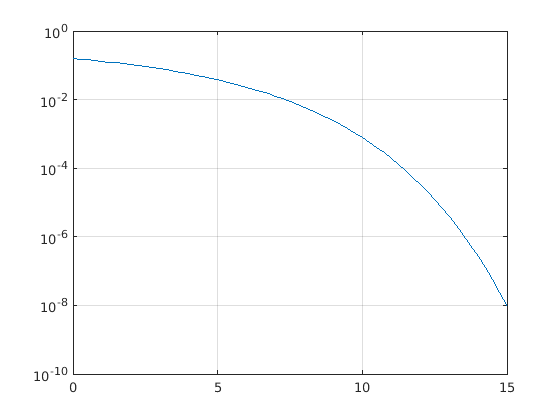

In [1]:
clc;clear all;close all;
%% Parâmetros
SNR_inicial=0;                                      % SNR inicial
SNR_final=15;                                       % SNR final
SNR_passo=0.25;                                     % Passo de SNR
SNR_dB=SNR_inicial:SNR_passo:SNR_final;             % Snr em dB
for i=1:length(SNR_dB)
    snr=10^(SNR_dB(i)/10);
    Pe(i)=qfunc(sqrt(snr));
    echo off;
end
echo on
semilogy(SNR_dB,Pe)
grid

## Simulação de Monte Carlo de um sistema de comunicações binário.
A simulação de um sistema de comunicações binário consiste em estimar a probabilidade de erro de bit a partir de sucessivos cálculos da taxa erro de bit (BER) com um número de amostras grande.
### Sinais ortogonais - Geração, transmissão e recepção 
Nessa simulação será gerada um vetor de bits que simbolizará nosso sinal transmitido $vtBin$. Como visto, quando

>  $s_{0}$ é transmitido $\left \{\begin{align*} r_{0} &= E + n_{0} \\  r_{1} &= n_{1}\end{align*}\right.$ 

>  $s_{1}$ é transmitido $\left\{\begin{align*} r_{0} &= n_{0} \\ r_{1} &= E+ n_{1} \end{align*}\right.$ 

Assim, procuramos no vetor de simbolos transmitido e usamos a função $find$ para localizar onde se encontram as amostras de zeros e uns,$vtIndex0$ e $vtIndex1$ respectivamente. Sabendo que a energia será $E$ ou $E+n_{i}$, acrescentaremos o ruído na forma de energia à variável de energia calculada do sinal $dE$ no processo referente a correlação. Isso é feito tanto para quando $s_{0}$ quanto para $s_{1}$ a partir dos indices.

### Detecção
O processo de detecção consiste em identificar para cada símbolo transmitido se a energia é maior ou menor ao símbolo que comparar. No matlab implementaremos da seguinte forma

In [16]:
Energia0=rand(1,5)
Energia1=rand(1,5)
Bit=Energia_zero<Energia_um


Energia0 =

    0.5033    0.8606    0.4182    0.1972    0.4265


Energia1 =

    0.3585    0.9088    0.1170    0.8328    0.4956


Bit =

     0     1     1     1     0



Em seguida queremos calcular o numero de erros ocorrido na detecção, ou seja, quando que $E+n_{i}<n_{j}$. Para isso, somaremos o vetor de bits transmitido ($vtBin$) com o vetor de bits que acabamos de detectar ($vtBinDetec$). 

> Acerto quando $\left \{\begin{align*} 0 + 0 &= 0 \\  1 + 1 &= 2\end{align*}\right.$

> Erro quando $\left \{\begin{align*} 0 + 1 &= 1 \\  1 + 0 &= 1\end{align*}\right.$

Ou seja, acerto quando o bit transmitido coincide com o detectado e erro quando o bit transmitido é diferente do detectado. Logo, onde houver 1 

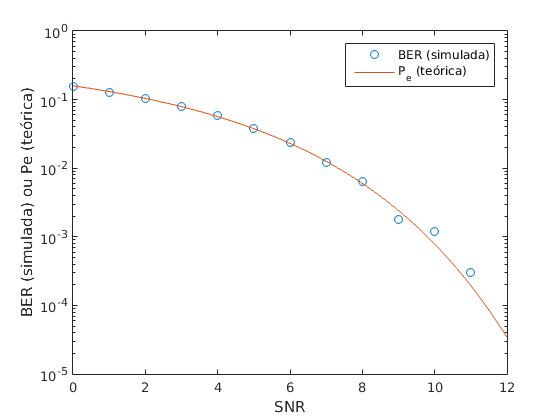

In [1]:
%% Mistura de 3 Codes: (Jupyter notebook não aceita função)
% scritpSimOrtogonal
% SimOrtogonal
% Qfunct
clear all;close all;clc;
%% Parâmetros
snr_in_dB=0:1:12;                               % SNR em dB
nMCSamples = 10000;                             % Número de amostras MMC
vtSNRTeo=0:0.1:12;                              % SNR em dB teórica (faremos com mais amostras)
dE = 1;                                         % Energia do símbolo s0 e s1
dSNR = exp(snr_in_dB*log(10)/10);               % SNR em escala linear
dsgma = dE./sqrt(2*dSNR);                       % Desvio padrão do ruído

%% Tranmissão 
vtBin = randi([0 1],1,nMCSamples);              % Geração dos números binários 0 e 1 com igual probabilidade
% Estima erro varrendo todos os valores de Snr
for ik=1:length(snr_in_dB)

vtIndex0 = find(vtBin == 0);                    % Acha os índice de bits iguais a 0
vtIndex1 = find(vtBin == 1);                    % Acha os índice de bits iguais a 1

% Dado que o ruído é de média zero e variancia dsgma^2, têm-se que 
% r=média+dsgma*randn(.)= dsgma*randn(.)
% Gera saida do correlator para cada entrada 0.
vtEnergiaRo(vtIndex0) = dE + dsgma(ik)*randn(1,length(vtIndex0));   % Saída r0
vtEnergiaR1(vtIndex0) = dsgma(ik)*randn(1,length(vtIndex0));        % Saída r1
% Gera saida do correlator para cada entrada 1  
vtEnergiaRo(vtIndex1) = dsgma(ik)*randn(1,length(vtIndex1));        % Saída r0
vtEnergiaR1(vtIndex1) = dE + dsgma(ik)*randn(1,length(vtIndex1));   % Saída r1

%% Detecção 
vtBinDetec = vtEnergiaRo < vtEnergiaR1;         % Detecção: 0 se, r0>r1; e 1, se r0<r1

%% Detecção de erro
% Detecção de erros (soma dos vetores originais e detectados)
% 0 + 0 = 0 (acerto)
% 1 + 1 = 2 (acerto)
% 0 + 1 = 1 (erro)
% 1 + 0 = 1 (erro)
vtError = vtBin + vtBinDetec; 
nErrors = length(find(vtError == 1));
% Estimativa da probabilidade de erro, i.e., BER
dBER = nErrors/nMCSamples;	  	     
vtSimError(ik)=dBER;
end

%% Gera a curva teórica
for ik=1:length(vtSNRTeo)
  dSNR=exp(vtSNRTeo(ik)*log(10)/10);   
  vtTeoError(ik)=(1/2)*erfc(sqrt(dSNR)/sqrt(2));
end
%% Plotting
semilogy(snr_in_dB,vtSimError,'o');
hold on;
semilogy(vtSNRTeo,vtTeoError);
legend('BER (simulada)', 'P_{e} (teórica)')
xlabel('SNR')
ylabel('BER (simulada) ou Pe (teórica)')

A diferença entre taxa de erro de bit estimada $BER$ e o valor da probabilidade de erro $P_{e}$ é referente ao número de estimativas realizadas. Conforme aumentamos, esta diferênca se torna menor.

### Sinais Antipodais

Dois sinais são ditos antipodais quando um é o negativo do outro. Um exemplo seria $s_{0}(t)=-A$ e $s_{0}(t)=A$. De uma forma geral, se $s_{0}(t)=s(t)$, então $s_{0}(t)=-s(t)$, sendo $s(t)$ um símbolo arbitrário qualquer cuja energia é designada $E$. O sinal recebido de um canal AWGN é expresso da seguinte forma:

$$ r(t)=\pm s(t)+n(t) $$

Para $0\leq t \leq T_{b}$. Um receptor ótimo para recuperar a informação binária emprega um único correlator ou um único filtro casado para $s(t)$, seguido do detector. Suponhamos que $s(t)$ seja transmitido, tal que o sinal recebido é:

$$ r(t)= s(t) + n(t) $$

A saída do correlator ou do filtro casado no instante $ t = T_{b}$ é

$$ r=E+n $$

Onde $E$ é a energia do sinal e $n$ é a componente de energia do ruído, a qual é expressada por:

$$ n=\int_{0}^{T_{b}}n(t)\cdot s(t)dt $$

Por o ruído $n(t)$ ser de média zero, entende que $E(n)=0$. A variância da componente de ruído $n$ é dada por :

$$ \sigma^{2}=E(n^{2}) $$

Através de algumas equações matemáticas, podemos chegar à seguinte conclusão:

$$\sigma^{2} = \frac{N_{0}E}{2}$$

Consequentemente, a probabilidade de erro é dada por:
$$P_{e} = Q\left (  \sqrt{\frac{E}{N_{0}}} \right )$$

O detalhamento matemático pode ser encontrado no livro do [Proakis](http://shannon.ir/Bookme/Contemporary%20Communication%20Systems%20Using%20MATLAB.pdf) (Pág 201), portanto,  nos deteremos apenas ao resultado. O mesmo é obtido quando é transmitido $-s(t)$. Isso permite dizer que os dois sinais têm mesma probabilidade de erro.

Consideremos então o seguinte simbolo para nossa análise:
$$s(t)= A$$

Para $ 0 \leq t \leq T_{b}$
Quando $s(t)$ é transmitido, a saída do correlator é dada por:
$$r=E+n$$

Logo, sendo sua distribuição normal cuja média $\mu_{+}=E$, concluímos que a função densidade de probabilidade é dada por:

$$p(r|s(t)\rightarrow transmitido)= \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{\frac{-(r+E )^2}{2\sigma^{2}}}$$

Fazendo a mesma analise, quando $-s(t)$é transmitido 

$$r=-E+n$$

Com média $\mu_{-}=E$. Então sua densidade de probabilidade é dada por:

$$p(r|-s(t)\rightarrow transmitido)= \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{\frac{-(r-E )^2}{2\sigma^{2}}}$$

Façamos então a estimação da $PDF$ de sinais antipodais 

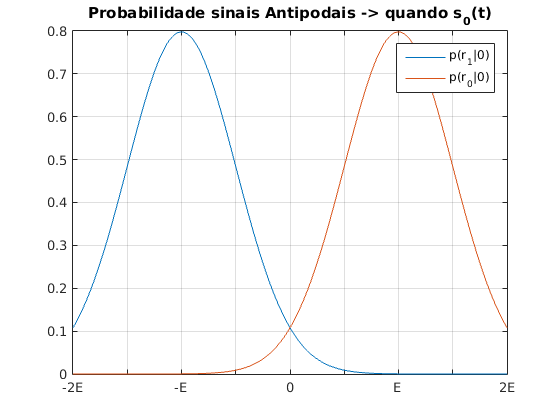

In [13]:
clc;clear all;close all;
%% Parâmetros
mu_0=-1;                                            % Média símbolo 0
mu_1=1;                                             % Média símbolo 1
var=0.5;                                            % Variância
x=-2:0.001:2;                                       % Eixo

%% Cálculo da distribuição Gausiana
dist_norm_0=normpdf(x,mu_0,var);                    % Distribuição prob s=s_{0}
dist_norm_1=normpdf(x,mu_1,var);                    % Distribuição prob s=s_{1}

%% Plotting
plot(x,dist_norm_0,x,dist_norm_1)
set(gca,'XTickLabel',{'-2E',' ',' -E ',' ','0',' ','E ',' ','2E'})
title('Probabilidade sinais Antipodais -> quando s_{0}(t)')
legend('p(r_{1}|0)','p(r_{0}|0)')
grid

Pode-se ver que uma das $PDF's$ está centralizada em $E$ enquanto a outra está centralizada em $-E$ para a mesma variância do ruído. Isso implica dizer que o erro ocorrerá onde ocorrer o cruzamento entre as duas probabilidades. Ou seja, a partir de $ r = 0 $ ocorrerá erro, enquanto para sinais ortogonais, a partir de $r = \frac{E}{2}$. Isso implica dizer que sinais antipodais têm uma melhor performace em relação a sinais ortogonais, pois por as duas distribuições terem medias uma negativa da outra, quanto maior a energia do simbolo, maior a distância do eixo zero, logo, menor a probabilidade de erro. 

Outro fator que contribuirá para menor probabilidade de erro é a largura da sua distribuição de probabilidade. Isso implica dizer que quanto maior variância do ruído, maior probabilidade de erro. Caso o sinal estivesse chegando pergeitamente no receptor sem ruído, consideraria que a energia do ruído nã interferiu no sinal, logo, as probabilidades seriam impulsos em $+E$ e em $-E$.


## Exemplo 3 
Seja dois simbolos de sinais antipodais definidos como:

>$s_{0}=A$ 

>$s_{1}=-A$

Para $ 0 \leq t \leq T_{b}$. Repita o exemplo 1 sendo a transmissão agora de simbolos antipodais

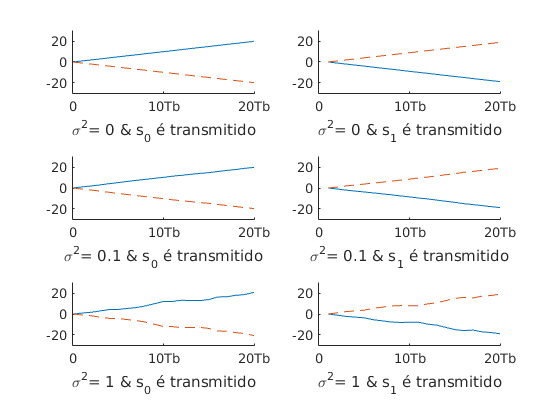

In [1]:
clc;clear all;close all;
%% Parametros
K=20;                                               % Número de amostras
A=1;                                                % Amplitude do sinal
l=0:K;                                              % Eixo amostras
% Definindo forma de onda
s_0=A*ones(1,K);                                    % Sinal 1: Um degrau
s_1=-s_0;                                           % Sinal 2: Soma de degraus
% Inicializando sinais de saida
r_0=zeros(1,K);                                     % Inicializa vetor r_0
r_1=zeros(1,K);                                     % Inicializa vetor r_1
Variancia = [0 0.1 1];                              % Variâncias

%% Cálculo
% Queremos estimar 
for  ik=1:3
noise=random('Normal',0,Variancia(ik),1,K);          % Gera vetor de ruído
%% Quando s_0 é transmitido
s=s_0;                                              % Sinal enviado
r=s+noise;                                          % Sinal recebido
% Correlacionando sinais
for n=1:K
        r_0(n)=sum(r(1:n).*s_0(1:n));
        r_1(n)=sum(r(1:n).*s_1(1:n));        
end
%% Plotting 
subplot(3,2,-1+2*ik)
hold on
plot(l,[0 r_0],'-')
plot(l,[0 r_1],'--')
set(gca,'XTickLabel',{'0','10Tb','20Tb'})
axis([0 20 -30 30])
xlabel(['\sigma^{2}= ' num2str(Variancia(ik)) ' & s_{0} é transmitido'])

%% Quando s_1 é transmitido
s=s_1;                                              % Sinal enviado
r=s+noise;                                          % Sinal recebido
for n=1:K
        r_0(n)=sum(r(1:n).*s_0(1:n));
        r_1(n)=sum(r(1:n).*s_1(1:n));       
end

%% Plotting 
subplot(3,2,2*ik)
hold on
plot([0 r_0],'-')
plot([0 r_1],'--')
set(gca,'XTickLabel',{'0','10Tb','20Tb'})
axis([0 20 -30 30])
xlabel(['\sigma^{2}= ' num2str(Variancia(ik)) ' & s_{1} é transmitido'])
end


## Exemplo 4
Seja dois simbolos de sinais antipodais definidos como:

>$s_{0}=A$ 

>$s_{1}=-A$

Para $ 0 \leq t \leq T_{b}$. Repita o exemplo 2 sendo a transmissão agora de simbolos antipodais:

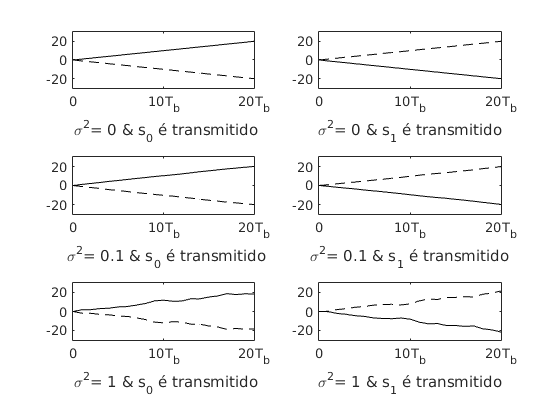

In [2]:
clc;clear all;close all;
%% Parametros
K=20;                                               % Número de amostras
A=1;                                                % Amplitude do sinal
l=0:K;                                              % Eixo amostras
Variancia=[0 0.1 1];                                % Vetor de variâncias de ruído

%% Definindo forma de onda dos símbolos
s_0=A*ones(1,K);                                    % Sinal 1: Um degrau
s_1=-s_0;                                           % Sinal 2: Soma de degraus

%% Filtragem
for ik= 1:3    
noise = random('Normal',0,Variancia(ik),1,K);       % Vetor com ruído
%% Quando s_0 é transmitido
s=s_0;                                              % Sinal enviado
y=s+noise;                                          % Sinal recebido
y_0=conv(y,wrev(s_0));                              % Concolução filtro casado saída 0
y_1=conv(y,wrev(s_1));                              % Concolução filtro casado saída 1

%% Plotting
subplot(3,2,-1+2*ik)
plot(l,[0 y_0(1:K)],'- k',l,[0 y_1(1:K)],'-- k')
set(gca,'XTickLabel',{'0','10T_{b}','20T_{b}'})
axis([0 20 -30 30 ])
xlabel([' \sigma^{2}= ' num2str(Variancia(ik)) ' & s_{0} é transmitido'])

%% Quando s_1 é transmitido
s=s_1;                                              % Sinal enviado
y=s+noise;                                          % Sinal recebido
y_0=conv(y,wrev(s_0));                              % Concolução filtro casado saída 0
y_1=conv(y,wrev(s_1));                              % Concolução filtro casado saída 1

%% Plotting 
subplot(3,2,2*ik)
plot(l,[0 y_0(1:K)],'- k',l,[0 y_1(1:K)],'-- k')
set(gca,'XTickLabel',{'0','10T_{b}','20T_{b}'})
axis([0 20 -30 30 ])
xlabel(['\sigma^{2}= ' num2str(Variancia(ik)) ' & s_{1} é transmitido'])
end

## Simulação de Monte Carlo:


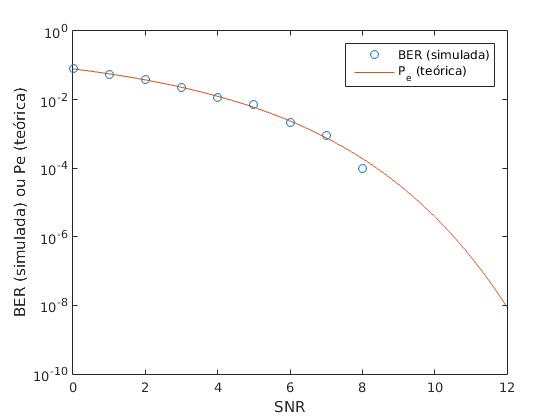

In [3]:
%% Mistura de 3 Codes: (Jupyter notebook não aceita função)
% scritpSimAntipodal
% SimAntipodal
% Qfunct
clear all;close all;clc;
%% Parâmetros
snr_in_dB=0:1:12;                                       % SNR em dB 
nMCSamples = 10000;                                     % Número de amostras MMC
vtSNRTeo=0:0.1:12;                                      % SNR em dB teórica (faremos com mais amostras)
dE = 10;                                                % Energia do sinal s0 e s1
dSNR = exp(snr_in_dB*log(10)/10);                       % SNR em escala linear
dsgma = dE./sqrt(2*dSNR);                               % Desvio padrão do ruído

%% Transmissão
vtBin = randi([0 1],1,nMCSamples);                      % Geração dos números binários 0 e 1 com igual probabilidade
% Estima erro varrendo todos os valores de Snr
for ik=1:length(snr_in_dB)
vtIndex0 = find(vtBin == 0);                            % Acha os índice de bits iguais a 0
vtIndex1 = find(vtBin == 1);                            % Acha os índice de buts iguais a 1

% Dado que o ruído é de média zero e variancia dsgma^2, têm-se que 
% r=média+dsgma*randn(.)= dsgma*randn(.)
% Gera saida do correlator para cada entrada 0.
vtEnergiaR(vtIndex0) = dE + dsgma(ik)*randn(1,length(vtIndex0));
vtEnergiaR(vtIndex1) = -dE + dsgma(ik)*randn(1,length(vtIndex1));

% Detecção: 0 se, r>0; e 1, se r<0
vtBinDetec = vtEnergiaR < 0;
% Detecção de erros (soma dos vetores originais e detectados)
% 0 + 0 = 0 (acerto)
% 1 + 1 = 2 (acerto)
% 0 + 1 = 1 (erro)
% 1 + 0 = 1 (erro)
vtError = vtBin + vtBinDetec; 
nErrors = length(find(vtError == 1));
% Estimativa da probabilidade de erro, i.e., BER
vtSimError(1,ik) = nErrors/nMCSamples;
end
%% Gera a curva teórica
for ik=1:length(vtSNRTeo)
  dSNR=exp(vtSNRTeo(ik)*log(10)/10);   
  vtTeoError(ik)=(1/2)*erfc(sqrt(2*dSNR)/sqrt(2));     
end

%% Plotting
semilogy(snr_in_dB,vtSimError,'o');
hold on;
semilogy(vtSNRTeo,vtTeoError);
legend('BER (simulada)', 'P_{e} (teórica)')
xlabel('SNR')
ylabel('BER (simulada) ou Pe (teórica)')
